### Homework
1. Do clustering on the digits dataset from sklearn using at least three different approaches
2. Evaluate the quality of clustering using three metrics from the lecture
3. Apply dimensionality reduction, then do clustering and calculate metrics.
4. Make a comparison table of different clustering approaches with and without dimensionality reduction.

In this task, we want to use 10 clusters, as we have 10 digits.

In [1]:
# !pip install scikit-learn-extra
# !pip install umap-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
digits = datasets.load_digits()

print(digits.data.shape)
print(digits.DESCR)

X, y = digits.data, digits.target
X, y

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This gene

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

<Figure size 640x480 with 0 Axes>

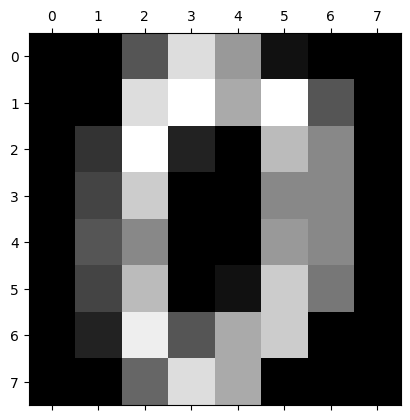

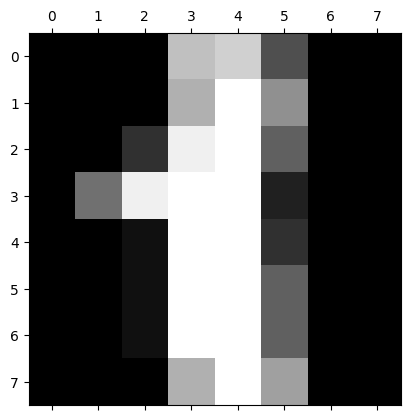

In [4]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
plt.show()

In [5]:
silhouette_score_for_true_labels = silhouette_score(X, y)
print(f"silhouette_score on true labels: {silhouette_score_for_true_labels}")

silhouette_score on true labels: 0.1629432052257522


In [6]:
def calculate_metrics(model_name, data_orig, data_transformed, labels, labels_predicted, scores=None):
    ami_score_result = adjusted_mutual_info_score(labels, labels_predicted)
    ar_score_result = adjusted_rand_score(labels, labels_predicted)
    silhouette_score_result = silhouette_score(data_orig, labels_predicted)
    silhouette_score_result_transformed = silhouette_score(data_transformed, labels_predicted)
    
    if print_metrics:
        print(f'Model: {model_name}')    
        print(f"adjusted_mutual_info_score: {ami_score_result}")
        print(f"adjusted_rand_score: {ar_score_result}")
        print(f"silhouette_score: {silhouette_score_result}")
        print(f"silhouette_score on transformed data: {silhouette_score_result_transformed}")
        print("-------------------------------------")
    
    if scores is not None:
        scores.loc[len(scores)] = (model_name, ami_score_result, ar_score_result, silhouette_score_result, silhouette_score_result_transformed)

print_metrics = True
scores = pd.DataFrame(columns=['model', 'ami', 'ar', 'silhouette', 'silhouette_transformed'])

In [7]:
def run_KMeans(model_name, X_orig, X_transformed, y, scores=None):
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, kmeans.labels_, scores)
    
run_KMeans("KMeans", X, X, y, scores)

Model: KMeans
adjusted_mutual_info_score: 0.7399582090362011
adjusted_rand_score: 0.66698038311706
silhouette_score: 0.18251449571917233
silhouette_score on transformed data: 0.18251449571917233
-------------------------------------


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
run_KMeans("KMeans scaled", X, X_scaled, y, scores)

Model: KMeans scaled
adjusted_mutual_info_score: 0.598469268038856
adjusted_rand_score: 0.46430875204743693
silhouette_score: 0.12452043890833235
silhouette_score on transformed data: 0.118775016932682
-------------------------------------


Scaler makes the result worse

### Try other clustering algorithms that support number of clusters as parameter

In [9]:
def run_GaussianMixture(model_name, X_orig, X_transformed, y, scores=None):
    model = GaussianMixture(n_components=10)
    labels_predicted = model.fit_predict(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, labels_predicted, scores)
    

def run_Birch(model_name, X_orig, X_transformed, y, scores=None):
    model = Birch(n_clusters=10)
    labels_predicted = model.fit_predict(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, labels_predicted, scores)


def run_KMedoids(model_name, X_orig, X_transformed, y, scores=None):
    model = KMedoids(n_clusters=10)
    labels_predicted = model.fit_predict(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, labels_predicted, scores)


run_GaussianMixture('GaussianMixture', X, X, y, scores)
run_Birch('Birch', X, X, y, scores)
run_KMedoids('KMedoids', X, X, y, scores)

Model: GaussianMixture
adjusted_mutual_info_score: 0.7516800519706099
adjusted_rand_score: 0.6631046480252415
silhouette_score: 0.17287579007925163
silhouette_score on transformed data: 0.17287579007925163
-------------------------------------
Model: Birch
adjusted_mutual_info_score: 0.8668321489750319
adjusted_rand_score: 0.7940031835568753
silhouette_score: 0.17849659940596496
silhouette_score on transformed data: 0.17849659940596496
-------------------------------------
Model: KMedoids
adjusted_mutual_info_score: 0.5158614671165285
adjusted_rand_score: 0.38804597814309
silhouette_score: 0.10670114255039931
silhouette_score on transformed data: 0.10670114255039931
-------------------------------------


In [10]:
def run_AgglomerativeClustering(model_name, X_orig, X_transformed, y, linkage, scores=None):
    model = AgglomerativeClustering(n_clusters=10, linkage=linkage)
    labels_predicted = model.fit_predict(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, labels_predicted, scores)
    

for linkage in ['ward', 'average', 'complete', 'single']:
    run_AgglomerativeClustering(f'Agglomerative - {linkage}', X, X, y, linkage, scores)

Model: Agglomerative - ward
adjusted_mutual_info_score: 0.8668321489750319
adjusted_rand_score: 0.7940031835568753
silhouette_score: 0.17849659940596496
silhouette_score on transformed data: 0.17849659940596496
-------------------------------------
Model: Agglomerative - average
adjusted_mutual_info_score: 0.7103101155580303
adjusted_rand_score: 0.5142255948681158
silhouette_score: 0.14662473962932557
silhouette_score on transformed data: 0.14662473962932557
-------------------------------------
Model: Agglomerative - complete
adjusted_mutual_info_score: 0.6091974206985209
adjusted_rand_score: 0.4286888142937744
silhouette_score: 0.1192708999859292
silhouette_score on transformed data: 0.1192708999859292
-------------------------------------
Model: Agglomerative - single
adjusted_mutual_info_score: 8.438956846943179e-05
adjusted_rand_score: 4.313084144605482e-05
silhouette_score: -0.1336211433529001
silhouette_score on transformed data: -0.1336211433529001
-----------------------------

In [11]:
scores.sort_values(by='ami', ascending=False)

,model,ami,ar,silhouette,silhouette_transformed
3,Birch,0.866832,0.794003,0.178497,0.178497
5,Agglomerative - ward,0.866832,0.794003,0.178497,0.178497
2,GaussianMixture,0.751680,0.663105,0.172876,0.172876
0,KMeans,0.739958,0.666980,0.182514,0.182514
6,Agglomerative - average,0.710310,0.514226,0.146625,0.146625
7,Agglomerative - complete,0.609197,0.428689,0.119271,0.119271
1,KMeans scaled,0.598469,0.464309,0.124520,0.118775
4,KMedoids,0.515861,0.388046,0.106701,0.106701
8,Agglomerative - single,0.000084,0.000043,-0.133621,-0.133621


In [12]:
feature_count = X.shape[1]
random_state = 0

pca_50pc = PCA(n_components=int(feature_count*0.50), random_state=random_state)
pca_2 = PCA(n_components=2, random_state=random_state)

X_pca_50pc = pca_50pc.fit_transform(X)
X_pca_2 = pca_2.fit_transform(X)


tsne = TSNE(random_state=random_state)
X_tsne = tsne.fit_transform(X)


umap = UMAP(random_state=random_state)
umap_n5 = UMAP(n_neighbors=5, random_state=random_state)

X_umap = umap.fit_transform(X)
X_umap_n5 = umap_n5.fit_transform(X)


c:\Python\envs\ds1\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Python\envs\ds1\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


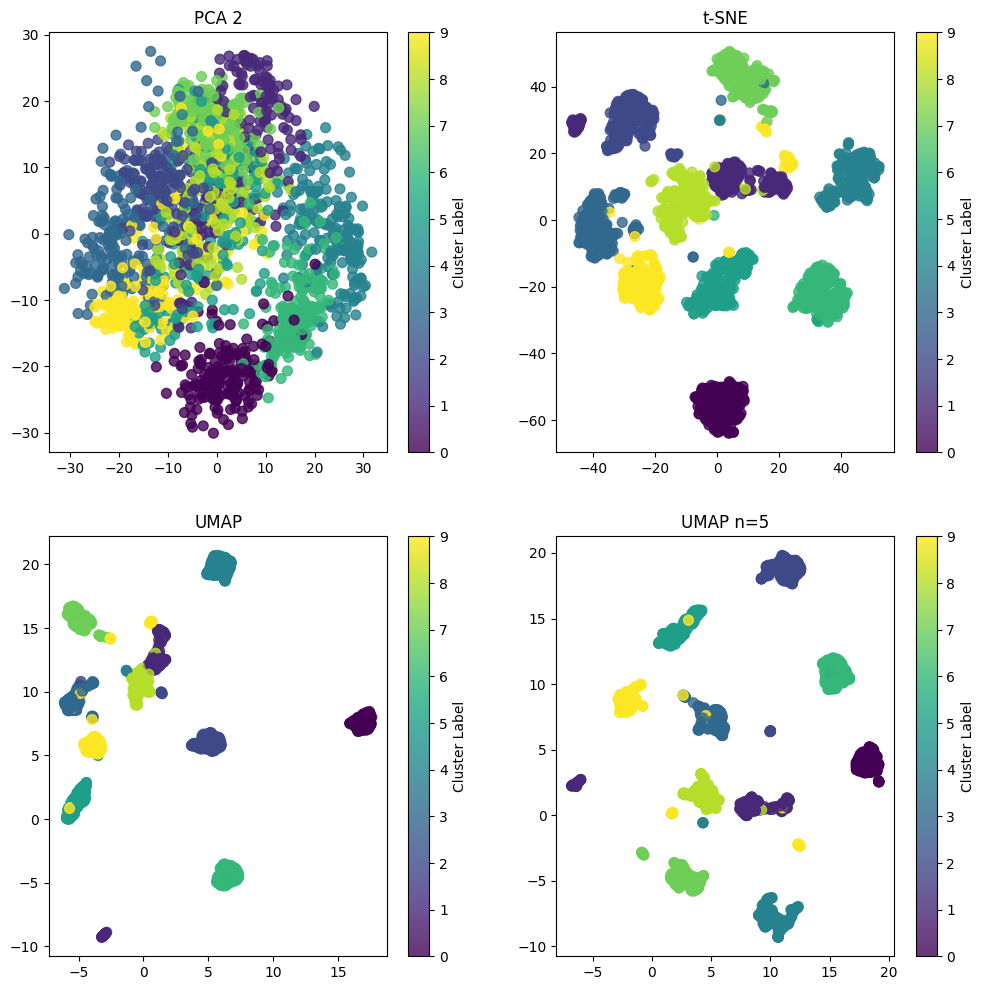

In [13]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("PCA 2")
plt.colorbar(label='Cluster Label')

plt.subplot(2, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("t-SNE")
plt.colorbar(label='Cluster Label')

plt.subplot(2, 2, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("UMAP")
plt.colorbar(label='Cluster Label')

plt.subplot(2, 2, 4)
plt.scatter(X_umap_n5[:, 0], X_umap_n5[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("UMAP n=5")
plt.colorbar(label='Cluster Label')

plt.show()

In [14]:
def run_ward(model_name, X_orig, X_transformed, y, scores):
    model = AgglomerativeClustering(n_clusters=10, linkage='ward')
    labels_predicted = model.fit_predict(X_transformed)
    calculate_metrics(model_name, X_orig, X_transformed, y, labels_predicted, scores)


models = {
    'KMeans': run_KMeans,
    'GaussianMixture': run_GaussianMixture,
    'Birch': run_Birch,
    'KMedoids': run_KMedoids,
    'Ward': run_ward
}

transformations = {
    'no transformation': X,
    'PCA 50%': X_pca_50pc,
    'PCA 2': X_pca_2,
    'TSNE': X_tsne,
    'UMAP': X_umap,
    'UMAP n5': X_umap_n5
}

def run_batch(models, transformations, X, y):
    res = []
    for model_name, model_runner in models.items():
        scores = pd.DataFrame(columns=['model', 'ami', 'ar', 'silhouette', 'silhouette_transformed'])
        for transformer_name, X_transformed in transformations.items():
            model_runner(model_name + ' ' + transformer_name, X, X_transformed, y, scores)
        
        scores = scores.sort_values(by='silhouette', ascending=False)
        res.append(scores)
        
    return res

print_metrics = False
res = run_batch(models, transformations, X, y)

In [15]:
res[0]

,model,ami,ar,silhouette,silhouette_transformed
0,KMeans no transformation,0.746561,0.653020,0.188089,0.188089
1,KMeans PCA 50%,0.723250,0.623099,0.182912,0.192068
3,KMeans TSNE,0.888982,0.823155,0.173515,0.597730
5,KMeans UMAP n5,0.926623,0.906208,0.163863,0.749908
4,KMeans UMAP,0.903459,0.820686,0.160019,0.784126
2,KMeans PCA 2,0.522782,0.388333,0.082076,0.392756


In [16]:
res[1]

,model,ami,ar,silhouette,silhouette_transformed
1,GaussianMixture PCA 50%,0.843513,0.806491,0.173572,0.182484
5,GaussianMixture UMAP n5,0.926623,0.906208,0.163863,0.749908
3,GaussianMixture TSNE,0.919146,0.899149,0.163863,0.644161
4,GaussianMixture UMAP,0.903459,0.820686,0.160019,0.784126
0,GaussianMixture no transformation,0.734955,0.598349,0.151118,0.151118
2,GaussianMixture PCA 2,0.509753,0.346109,0.073822,0.375115


In [17]:
res[2]

,model,ami,ar,silhouette,silhouette_transformed
4,Birch UMAP,0.872688,0.774425,0.180629,0.739763
0,Birch no transformation,0.866832,0.794003,0.178497,0.178497
1,Birch PCA 50%,0.841366,0.749732,0.174196,0.183072
3,Birch TSNE,0.920168,0.900242,0.164013,0.644778
5,Birch UMAP n5,0.926623,0.906208,0.163863,0.749908
2,Birch PCA 2,0.493437,0.369976,0.072547,0.316815


In [18]:
res[3]

,model,ami,ar,silhouette,silhouette_transformed
3,KMedoids TSNE,0.911190,0.889946,0.163633,0.643763
0,KMedoids no transformation,0.515861,0.388046,0.106701,0.106701
5,KMedoids UMAP n5,0.837641,0.699220,0.093040,0.555944
2,KMedoids PCA 2,0.532619,0.422753,0.089587,0.389027
1,KMedoids PCA 50%,0.430238,0.301851,0.084568,0.088106
4,KMedoids UMAP,0.824331,0.641350,0.079819,0.503167


In [19]:
res[4]

,model,ami,ar,silhouette,silhouette_transformed
0,Ward no transformation,0.866832,0.794003,0.178497,0.178497
1,Ward PCA 50%,0.841366,0.749732,0.174196,0.183072
3,Ward TSNE,0.908747,0.884660,0.164318,0.641893
5,Ward UMAP n5,0.926623,0.906208,0.163863,0.749908
4,Ward UMAP,0.903459,0.820686,0.160019,0.784126
2,Ward PCA 2,0.497240,0.342762,0.074800,0.352536


In [20]:
pd.concat(res).sort_values(by='ami', ascending=False).head(10)

,model,ami,ar,silhouette,silhouette_transformed
5,Ward UMAP n5,0.926623,0.906208,0.163863,0.749908
5,Birch UMAP n5,0.926623,0.906208,0.163863,0.749908
5,KMeans UMAP n5,0.926623,0.906208,0.163863,0.749908
5,GaussianMixture UMAP n5,0.926623,0.906208,0.163863,0.749908
3,Birch TSNE,0.920168,0.900242,0.164013,0.644778
3,GaussianMixture TSNE,0.919146,0.899149,0.163863,0.644161
3,KMedoids TSNE,0.911190,0.889946,0.163633,0.643763
3,Ward TSNE,0.908747,0.884660,0.164318,0.641893
4,Ward UMAP,0.903459,0.820686,0.160019,0.784126
4,KMeans UMAP,0.903459,0.820686,0.160019,0.784126


In [21]:
pd.concat(res).sort_values(by='ar', ascending=False).head(10)

,model,ami,ar,silhouette,silhouette_transformed
5,GaussianMixture UMAP n5,0.926623,0.906208,0.163863,0.749908
5,Birch UMAP n5,0.926623,0.906208,0.163863,0.749908
5,KMeans UMAP n5,0.926623,0.906208,0.163863,0.749908
5,Ward UMAP n5,0.926623,0.906208,0.163863,0.749908
3,Birch TSNE,0.920168,0.900242,0.164013,0.644778
3,GaussianMixture TSNE,0.919146,0.899149,0.163863,0.644161
3,KMedoids TSNE,0.911190,0.889946,0.163633,0.643763
3,Ward TSNE,0.908747,0.884660,0.164318,0.641893
3,KMeans TSNE,0.888982,0.823155,0.173515,0.597730
4,Ward UMAP,0.903459,0.820686,0.160019,0.784126


In [22]:
pd.concat(res).sort_values(by='silhouette', ascending=False).head(10)

,model,ami,ar,silhouette,silhouette_transformed
0,KMeans no transformation,0.746561,0.653020,0.188089,0.188089
1,KMeans PCA 50%,0.723250,0.623099,0.182912,0.192068
4,Birch UMAP,0.872688,0.774425,0.180629,0.739763
0,Ward no transformation,0.866832,0.794003,0.178497,0.178497
0,Birch no transformation,0.866832,0.794003,0.178497,0.178497
1,Ward PCA 50%,0.841366,0.749732,0.174196,0.183072
1,Birch PCA 50%,0.841366,0.749732,0.174196,0.183072
1,GaussianMixture PCA 50%,0.843513,0.806491,0.173572,0.182484
3,KMeans TSNE,0.888982,0.823155,0.173515,0.597730
3,Ward TSNE,0.908747,0.884660,0.164318,0.641893


### Let's see if silhouette score may help us to find the correct number of clusters

In [23]:
def run_Birch_for_n_clusters(n_clusters, X_orig, X_transformed):
    model = Birch(n_clusters=n_clusters)
    labels_predicted = model.fit_predict(X_transformed)
    return (silhouette_score(X_orig, labels_predicted), silhouette_score(X_transformed, labels_predicted))

n_clusters = range(2, 30)
silhouette_scores = np.array([run_Birch_for_n_clusters(n, X, X_umap) for n in n_clusters])

df = pd.DataFrame({
    'n_clusters': n_clusters, 
    'silhouette_scores_orig': silhouette_scores[:,0],
    'silhouette_scores_transformed': silhouette_scores[:,1],
})
df.sort_values(by='silhouette_scores_orig', ascending=False).head(10)

,n_clusters,silhouette_scores_orig,silhouette_scores_transformed
8,10,0.180629,0.739763
22,24,0.176935,0.633088
21,23,0.175383,0.633518
18,20,0.174570,0.630834
17,19,0.174224,0.676293
16,18,0.174020,0.684038
20,22,0.173438,0.648089
9,11,0.173100,0.775131
19,21,0.172797,0.638982
14,16,0.172746,0.719004


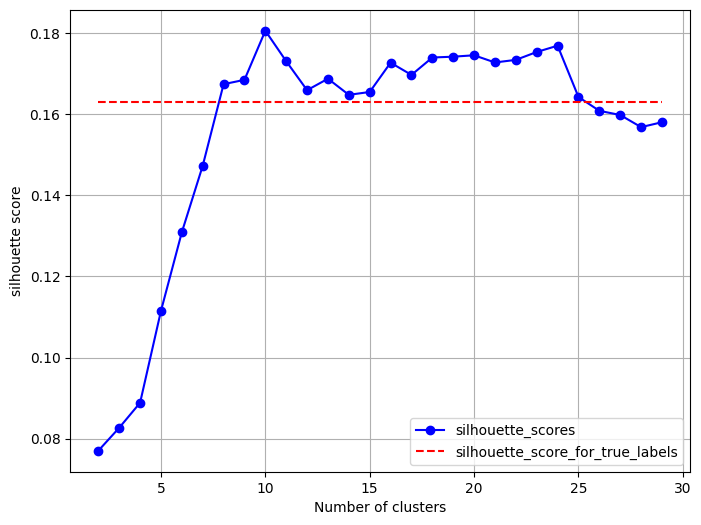

In [24]:
def draw_plot(X,y):
    plt.figure(figsize=(8, 6))
    plt.plot(X, y, marker='o', linestyle='-', color='b', label='silhouette_scores')
    plt.plot(X, np.ones(len(y))*silhouette_score_for_true_labels, linestyle='--', color='r', label='silhouette_score_for_true_labels')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.grid(True)
    plt.show()
    
draw_plot(df['n_clusters'], df['silhouette_scores_orig'])

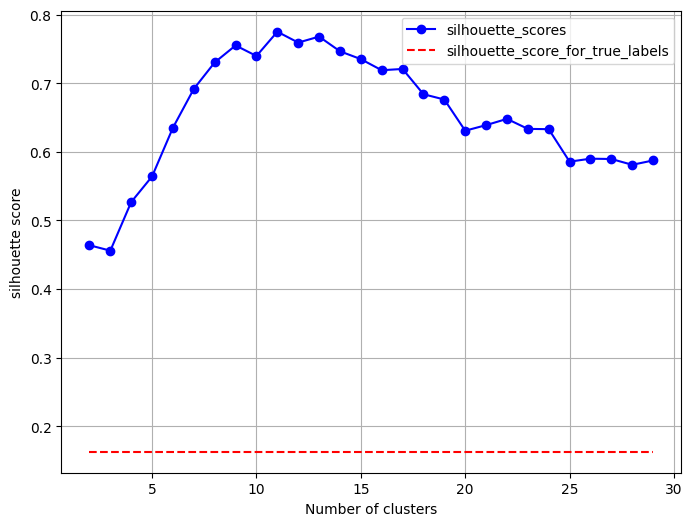

In [25]:
draw_plot(df['n_clusters'], df['silhouette_scores_transformed'])

- Using silhouette_score for non-transformed data gives correct number of clusters.
- Interestingly, score on predicted labels is higher than on true labels.
- Even though, the score on non-transformed data gives peak value at n=10, the plateau is wide. Applying silhouette_score on transformed data doesn't give correct single peak value but gives narrow plateau at top scores and allows to find a good approximation for unknown data.
- In both cases looking for "elbow" of the chart allows us to find a number close to the correct one.

In [26]:
def run_AffinityPropagation(transformer_name, X_transformed):
    model_aff = AffinityPropagation()
    model_aff.fit(X_transformed)
    cluster_cnt = max(model_aff.labels_)
    print(f'{transformer_name}: cluster count={cluster_cnt}')


for transformer_name, X_transformed in transformations.items():
    run_AffinityPropagation(transformer_name, X_transformed)

no transformation: cluster count=102
PCA 50%: cluster count=99


c:\Python\envs\ds1\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


PCA 2: cluster count=31


c:\Python\envs\ds1\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


TSNE: cluster count=437


c:\Python\envs\ds1\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


UMAP: cluster count=888
UMAP n5: cluster count=939


c:\Python\envs\ds1\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Can't make AffinityPropagation to work

# Conclusion

- If number of clusters is known, select algorithms that support such parameter.
- UMAP and T-SNE improve clustering score on metrics adjusted_mutual_info_score and adjusted_rand_score significantly. UMAP n=5 performs the best.
- PCA provided no improvement of the metrics. I guess it's main purpose is to trade speed of training for score.
- Interestingly, silhouette_score on true labels is 0.1629 while on predicted it's higher (up to 0.1880) . This might tell us about quality of data, maybe different numbers look more simillar than the same numbers written differently.